<H1>Classification using Bayesian Classifier</H1>

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [23]:
datasets = ['Linearly seperable', 'Nonlinearly separable', 'Real world']
classifiers = ['Same diagonal covariance matrix for all class', 'Same full covariance matrix for all class', 'Different diagonal covariance matrix for each class', 'Different full covariance matrix for each class']

for i in range(len(datasets)):
    print(str(i+1)+')'+datasets[i])
dataset_option = int(input('Enter Dataset Number: '))
print('Dataset choosen = %d'%(int(dataset_option)))

if dataset_option == 1:
    path = r'D:/Pattern Recognition/Assignment/Assignment_01/ls_data'
    nclass = 2
elif dataset_option == 2:
    path = r'D:/Pattern Recognition/Assignment/Assignment_01/nls_data'
    nclass = 2
else:
    path = r'D:/Pattern Recognition/Assignment/Assignment_01/real_world_data'
    nclass = 3
os.chdir(path)
files = []
for file in os.listdir(path):
    if file.endswith(".txt"):
        files.append(os.path.join(path, file))
print(path)
print(files)

1)Linearly seperable
2)Nonlinearly separable
3)Real world


Enter Dataset Number:  3


Dataset choosen = 3
D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment_01/real_world_data
['D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment_01/real_world_data\\class1.txt', 'D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment_01/real_world_data\\class2.txt', 'D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment_01/real_world_data\\class3.txt']


In [24]:
## Split  the training and tesing data ##
def get_data(dataset):
    train = dataset.sample(frac=0.80, random_state=100)
    test = dataset[~dataset.index.isin(train.index)]
    return train, test

In [25]:
train_data = pd.DataFrame(columns=['X', 'Y', 'label'])
test_data = pd.DataFrame(columns=['X', 'Y', 'label'])
alldata = pd.DataFrame(columns=['X', 'Y', 'label'])
class_mean, class_cov_mat = np.empty([nclass, 2]), np.empty([nclass, 2, 2])

for file, i in zip(files, range(len(files))):
    if dataset_option == 3:
        data = pd.read_csv(file, header=None, delim_whitespace=True)
    else:
        data = pd.read_csv(file, header=None)
    data.rename(columns = {0:'X', 1:'Y'}, inplace = True)
    data['label'] = [i for _ in range(data.shape[0])]
    data=data.sample(frac=1).reset_index(drop=True)
    ### Split data in training and test dataset
    temp_train, temp_test = get_data(data)
    train_data = train_data.append(temp_train)
    test_data = test_data.append(temp_test)
    alldata = alldata.append(data)
    ### Calculating the mean and covariance matrices for all class datasets
    class_mean[i] = np.asarray(temp_train[['X', 'Y']].mean())
    class_cov_mat[i] = np.asarray(temp_train[['X', 'Y']].cov())

P = alldata['label'].value_counts(normalize=True)
print("Mean={}\nCov_Mat={},\nPrior_Prob={}\n".format(class_mean, class_cov_mat, P))

Mean=[[ 315.15052356 2276.88767997]
 [ 726.4383846  1117.51696996]
 [ 423.78443808 2088.1857781 ]]
Cov_Mat=[[[17558.72275747  -519.41978579]
  [ -519.41978579 11620.84247854]]

 [[ 7542.49222115  3907.1200062 ]
  [ 3907.1200062   6590.40052584]]

 [[ 6174.52913585  1809.24343928]
  [ 1809.24343928 28922.33323886]]],
Prior_Prob=0    0.348970
2    0.334795
1    0.316236
Name: label, dtype: float64



In [26]:
def likelihood(test_vector, mean_vector, cov_mat):
    size = len(test_vector)
    if size == len(mean_vector) and (size, size) == cov_mat.shape:
        ### get the determinant of covariance matrix
        det = np.linalg.det(cov_mat)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")
        ### Find the constant term of likelihood
        norm_const = 1.0/(math.pow((2*np.pi), float(size)/2) * math.pow(det,1.0/2))
        x_mu = np.matrix(test_vector - mean_vector)
        inv = np.linalg.inv(cov_mat)        
        result = math.pow(math.e, (-0.5 * np.dot(np.dot(x_mu, inv), x_mu.T)))
        norm_density = norm_const * result
        return(norm_density) 
    else:
        raise NameError("The dimensions of the input don't match")

In [27]:
### Function to classify the dataset and returns lists of actual and predicted class label
def classifier(test_data, class_mean, class_cov_mat, P):
    if isinstance(test_data, list):
        posterier = []
        for i in range(len(class_mean)):
            prob = P[i]*likelihood(np.array(test_data), class_mean[i], class_cov_mat[i])
            posterier.append(prob)
        return np.argmax(posterier)
    else:
        predicted_label = []
        for index, row in test_data.iterrows():
            posterier = []
            for i in range(len(class_mean)):
                prob = P[i]*likelihood(np.array(row[['X', 'Y']]), class_mean[i], class_cov_mat[i])
                posterier.append(prob)
            predicted_label.append(np.argmax(posterier))
        return predicted_label


In [28]:
## Calculate other parameters related to confusion matrix ##
# Here we are getting 3 confusion matrix - for LS, NLS and for Real Data. 
def confsnMatParameter(cmat):
    # Classification accuracy
    classification_accuracy = np.sum(cmat.diagonal()) * 100.0 / np.sum(cmat)
#     # precision for every class
#     rsum = np.sum(cmat, axis=1)
#     csum = np.sum(cmat, axis=0)
#     precision = []
#     recall = []
#     fmeasure = []
#     for i in range(len(cmat)):
#         # precision for every class
#         precision.append(cmat[i][i] * 1.0 / rsum[i])

#         # recall for every class
#         recall.append(cmat[i][i] * 1.0 / csum[i])
#         # F-measure for every class
#         fmeasure.append(2.0 * precision[i] * recall[i] / (precision[i] + recall[i]))
#     # mean precision
#     mprecision = sum(precision) * 1.0 / len(cmat)
#     # mean recall
#     mrecall = sum(recall) * 1.0 / len(cmat)
#     # mean F-measure
#     mfmeasure = sum(fmeasure) * 1.0 / len(cmat)
#     return classification_accuracy, precision, recall, fmeasure, mprecision, mrecall, mfmeasure
    return classification_accuracy

# Calculating confusion matrix ##
CM = np.zeros([len(class_mean), len(class_mean)])
predicted_label = classifier(test_data, class_mean, class_cov_mat, P)
actual_label = list(test_data['label'])
for i in range(len(actual_label)):
    if predicted_label[i] == 0:
        if actual_label[i] == 0:
            CM[0][0] += 1
        if actual_label[i] == 1:
            CM[0][1] += 1
        if actual_label[i] == 2:
            CM[0][2] += 1
    elif predicted_label[i] == 1:
        if actual_label[i] == 0:
            CM[1][0] += 1
        if actual_label[i] == 1:
            CM[1][1] += 1
        if actual_label[i] == 2:
            CM[1][2] += 1
    else:
        if actual_label[i] == 0:
            CM[2][0] += 1
        if actual_label[i] == 1:
            CM[2][1] += 1
        if actual_label[i] == 2:
            CM[2][2] += 1

# classification_accuracy, precision, recall, fmeasure, mprecision, mrecall, mfmeasure = confsnMatParameter(CM)
classification_accuracy = confsnMatParameter(CM)

print ("\nThe Confusion Matrix:")
print (CM)
print ("\nClassification Accuracy = " + str(classification_accuracy))
# for i in range(len(CM)):
#     print ("\nPrecision for Class" + str(i + 1) + " = " + str(precision[i]))
# print ("\nMean Precision = " + str(mprecision))
# for i in range(len(CM)):
#     print ("\nRecall for Class" + str(i + 1) + " = " + str(recall[i]))
# print ("\nMean Recall = " + str(mrecall))
# for i in range(len(CM)):
#     print ("\nF-Measure for Class" + str(i + 1) + " = " + str(fmeasure[i]))
# print ("\nMean F-measure = " + str(mfmeasure))


The Confusion Matrix:
[[458.   0.  74.]
 [  1. 433.   2.]
 [ 19.   0. 382.]]

Classification Accuracy = 92.98758217677137


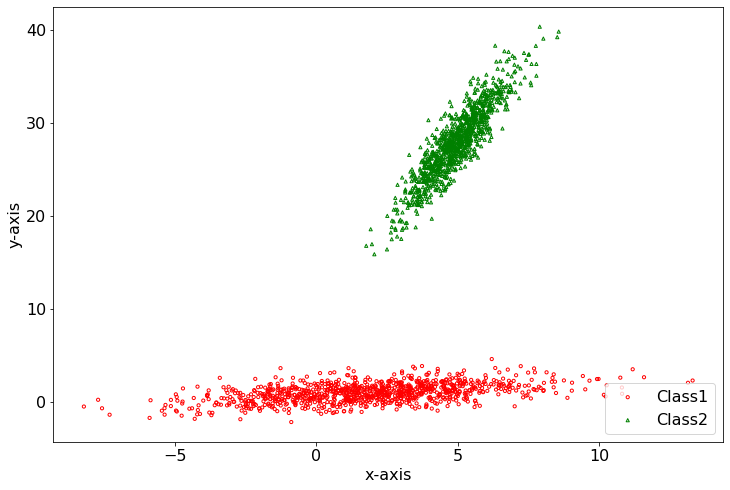

<Figure size 432x288 with 0 Axes>

In [20]:
## For ploting dataset ##
def dataPlot(alldataset, name):
    colors = ("red", "green", "blue")
    groups = ("Class1", "Class2", "Class3")
    mk = ('o', '^', 's')
    # Create plot
    fig, ax = plt.subplots(figsize=(12,8))
    for i in alldataset['label'].unique():
        ax.scatter(alldataset[alldataset['label']==i]['X'], alldataset[alldataset['label']==i]['Y'], alpha=1.0, marker=mk[i], edgecolors=colors[i], facecolor='none', s=10, label=groups[i])
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend(loc=4)
    plt.rcParams.update({'font.size': 16})
    fig.savefig("../data_plot_" + name + ".png", dpi=300, format='png', bbox_inches='tight')
    plt.show()
    plt.clf()
    
# dataplot for all training dataset
if dataset_option == 1:
    name = 'LS'
elif dataset_option == 2:
    name = 'NLS'
else:
    name = 'RealData'
### Scatter Plot of dataset
dataPlot(alldata, name)

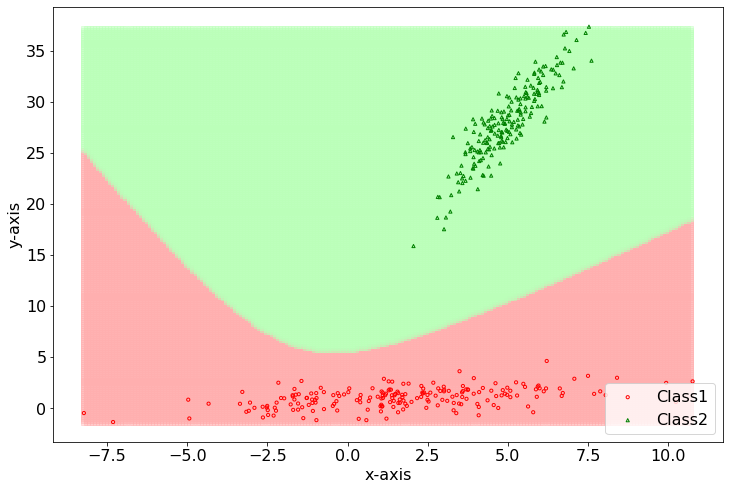

<Figure size 432x288 with 0 Axes>

In [21]:
## For ploting decision boundary region 
def boundaryPlot(alldataset, class_mean, class_cov, name):
    ### Find the datapoints boundary
    (xmin, xmax), (ymin, ymax) = alldataset[['X', 'Y']].apply(lambda x: pd.Series([x.min(), x.max()])).T.values.tolist()
    x0, x1, x2, y0, y1, y2 = [], [], [], [], [], []
    for x in np.arange(xmin, xmax, (xmax-xmin)/200.0):
        for y in np.arange(ymin, ymax, (ymax-ymin)/200.0):
            c = classifier([x, y], class_mean, class_cov, P)
            if c == 0:
                x0.append(x)
                y0.append(y)
            elif c == 1:
                x1.append(x)
                y1.append(y)
            else:
              x2.append(x)
              y2.append(y)

    colors = ("red", "green", "blue")
    cat_color = (u'#FFAFAF', u'#BBFFB9', u'#BBB9FF')
    groups = ("Class1", "Class2", "Class3")
    mk = ('o', '^', 's')
    ### Create plot
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(x0, y0, alpha=0.4, marker='s', edgecolors=cat_color[0], facecolor=cat_color[0], s=40)
    ax.scatter(x1, y1, alpha=0.4, marker='s', edgecolors=cat_color[1], facecolor=cat_color[1], s=40)
    ax.scatter(x2, y2, alpha=0.4, marker='s', edgecolors=cat_color[2], facecolor=cat_color[2], s=40)
    for i in alldataset['label'].unique():
        ax.scatter(alldataset[alldataset['label']==i]['X'], alldataset[alldataset['label']==i]['Y'], alpha=1.0, marker=mk[i], edgecolors=colors[i], facecolor='none', s=10, label=groups[i])
    # plt.title('Decision region of dataset in Class1, Class2, and Class3')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend(loc=4)
    plt.rcParams.update({'font.size': 16})
    fig.savefig("../Boundary_Plot_"+ name +".png", dpi=300, format='png', bbox_inches='tight')
    plt.show()
    plt.clf()

boundaryPlot(test_data, class_mean, class_cov_mat, name)